# K-Means Clustering

## Pengertian K-Means Clustering

K-Means Clustering  adalah teknik pengelompokan data yang memisahkan data ke dalam cluster, mengelompokkan data dengan fitur yang sama bersama-sama dan mengelompokkan data dengan karakteristik yang berbeda ke dalam kelompok yang berbeda dengan centroid sebagai acuannya. Metode k-means membagi data menjadi beberapa kelompok sehingga data dengan karakteristik yang sama berada pada cluster yang sama dan data dengan karakteristik yang berbeda berada pada cluster yang berbeda


## Manfaat Clustering


- Clustering merupakan metode segmentasi data yang sangat berguna dalam prediksi dan analisa masalah bisnis tertentu. Misalnya Segmentasi pasar, marketing dan pemetaan zonasi wilayah.
- Identifikasi obyek dalam bidang berbagai bidang seperti computer vision dan image processing.

Hasil clustering yang baik akan menghasilkan tingkat kesamaan yang tinggi dalam satu kelas dan tingkat kesamaan yang rendah antar kelas. Kesamaan yang dimaksud merupakan pengukuran secaranumeric terhadap dua buah objek. Nilai kesamaan antar kedua objek akan semakin tinggi jika kedua objek yang dibandingkan memiliki kemiripan yang tinggi. Begitu juga dengan sebaliknya. Kualitas hasil clustering sangat bergantung pada metode yang dipakai

## Inertia (Sum Square error/SSE)


Dalam konteks algoritma *K-Means Clustering*, *inertia* (Sum Square error/SSE) adalah salah satu metrik evaluasi untuk menilai seberapa baik data dikelompokkan ke dalam klaster serta mengukur jumlah total jarak kuadrat antara setiap titik data dan pusat klaster (centroid) tempat titik tersebut.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

Penjelasan Notasi
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## Implementasi dengan menggunakan data Iris

In [4]:
%pip install pymysql
%pip install psycopg2

## Library yang digunakan

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

Kode ini nantinya berfungsi untuk mengambil data dari dua database yang berbeda, yaitu PostgreSQL dan MySQL. Data dari PostgreSQL diambil dari tabel nabila.postgres, sedangkan data dari MySQL diambil dari tabel irismysql. Setelah data dari kedua sumber dimuat ke dalam bentuk DataFrame menggunakan pustaka pandas, keduanya digabungkan berdasarkan kolom yang sama, yaitu id dan class, menggunakan metode inner join. Hasil akhirnya adalah tabel gabungan yang hanya menampilkan baris-baris yang memiliki nilai id dan class yang sama di kedua tabel, lalu ditampilkan ke layar tanpa menampilkan indeks baris.

In [6]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-382999bb-posgresqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_AwzON_kzF3kYXNu_CrZ",
        database="defaultdb",
        port=11188
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM nabila.postgres;")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-144b909e-mysqlll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_UkzghDQ6mbisK-glP-x",
        database="iris",
        port=17474
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2          51.0         35.0
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2          47.0         32.0
  4     Iris-setosa           1.5          0.2          46.0         31.0
  5     Iris-setosa           1.4          0.2          50.0         36.0
  6     Iris-setosa           1.7          0.4          54.0         39.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Ini adalah data sebelum normalisasi

In [7]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
          1.4          0.2          51.0         35.0
         14.0          2.0          40.9         30.0
          1.3          0.2          47.0         32.0
          1.5          0.2          46.0         31.0
          1.4          0.2          50.0         36.0
          1.7          0.4          54.0         39.0
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

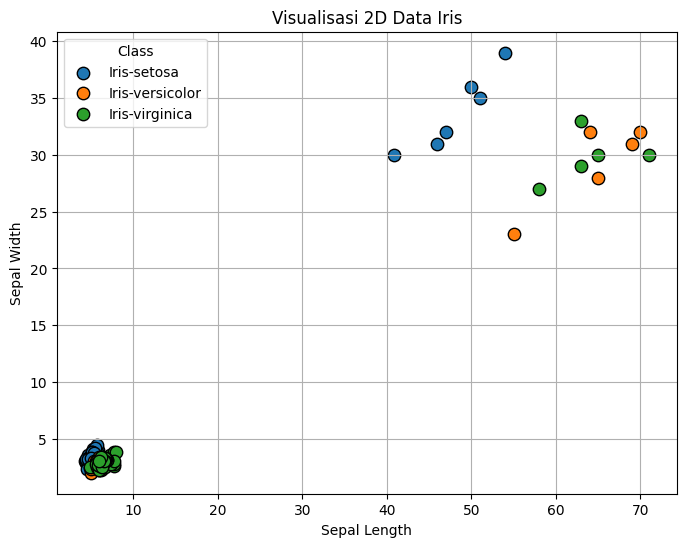

In [8]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

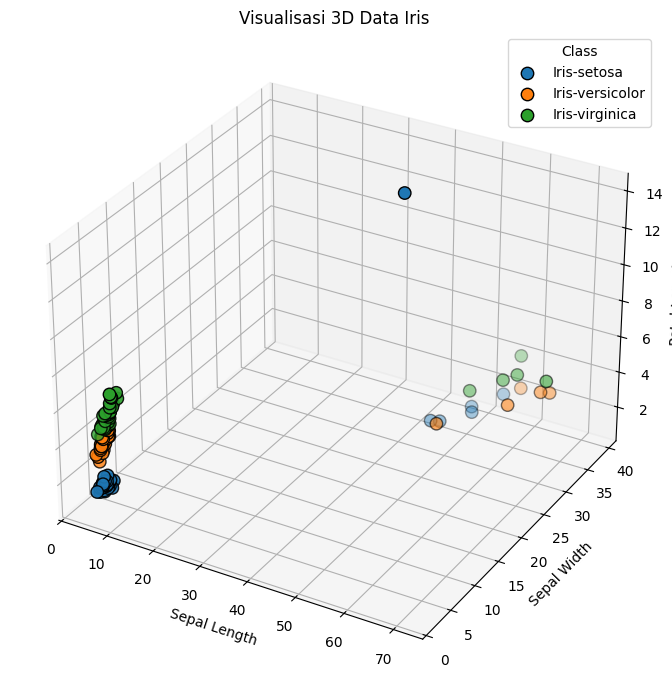

In [9]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

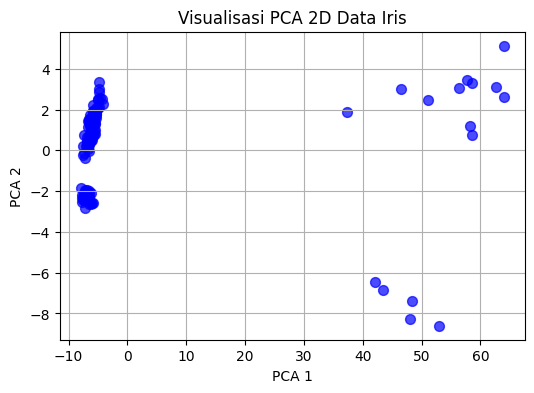

In [10]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

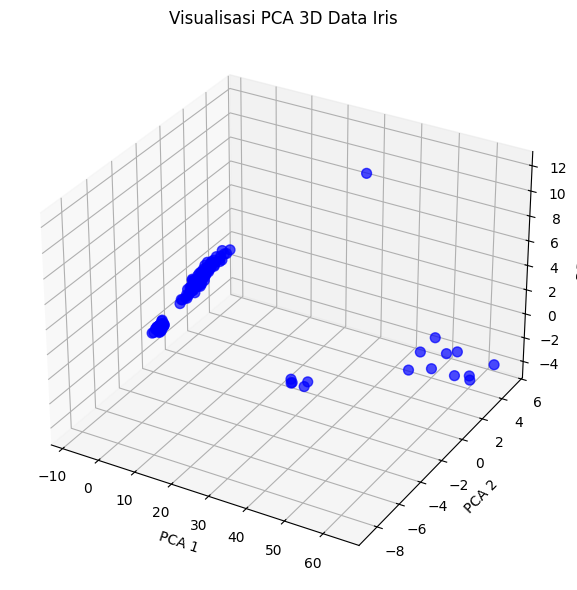

In [11]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


### Standarisasi dengan menggunakan MinMaxScaler

Normalisasi menggunakan MinMaxScaler saya lakukan untuk menyamakan skala pada seluruh fitur dalam dataset yang memiliki rentang nilai berbeda-beda. Perbedaan skala ini bisa menyebabkan algoritma machine learning memberikan perhatian lebih pada fitur yang angkanya besar, padahal belum tentu fitur tersebut paling relevan. Dengan MinMaxScaler, nilai-nilai dalam setiap fitur diubah ke dalam rentang 0 hingga 1, sehingga semua fitur memiliki kontribusi yang setara dalam proses pelatihan model.

Metode ini sangat membantu terutama pada algoritma yang sensitif terhadap jarak antar data, seperti KNN atau SVM. Tanpa normalisasi, algoritma-algoritma tersebut bisa salah mengukur kedekatan antar data karena terpengaruh oleh fitur yang skalanya lebih dominan. Setelah melakukan normalisasi, performa model yang saya bangun menjadi lebih baik dan hasilnya lebih stabil. Proses pelatihan pun berlangsung lebih efisien karena data sudah berada dalam kondisi yang seragam.

Dari sini saya belajar bahwa normalisasi bukan hanya bagian teknis dalam preprocessing, tapi juga strategi penting untuk memastikan keadilan dalam perlakuan terhadap setiap fitur. Data yang seimbang secara skala memungkinkan model belajar secara objektif tanpa bias angka. MinMaxScaler jadi salah satu tahap yang tidak boleh dilewatkan dalam membangun model yang andal dan berkinerja baik.

In [14]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [22]:
print (scaled_features);

[[0.03076923 0.04166667 0.70014993 0.89189189]
 [1.         0.79166667 0.54872564 0.75675676]
 [0.02307692 0.04166667 0.64017991 0.81081081]
 [0.03846154 0.04166667 0.62518741 0.78378378]
 [0.03076923 0.04166667 0.68515742 0.91891892]
 [0.05384615 0.125      0.74512744 1.        ]
 [0.03076923 0.08333333 0.00449775 0.03783784]
 [0.03846154 0.04166667 0.01049475 0.03783784]
 [0.03076923 0.04166667 0.00149925 0.02432432]
 [0.03846154 0.         0.0089955  0.02972973]
 [0.03846154 0.04166667 0.01649175 0.04594595]
 [0.04615385 0.04166667 0.00749625 0.03783784]
 [0.03076923 0.         0.00749625 0.02702703]
 [0.00769231 0.         0.         0.02702703]
 [0.01538462 0.04166667 0.02248876 0.05405405]
 [0.03846154 0.125      0.02098951 0.06486486]
 [0.02307692 0.125      0.01649175 0.05135135]
 [0.03076923 0.08333333 0.011994   0.04054054]
 [0.05384615 0.08333333 0.02098951 0.04864865]
 [0.03846154 0.08333333 0.011994   0.04864865]
 [0.05384615 0.04166667 0.01649175 0.03783784]
 [0.03846154 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Di sini saya melakukan clustering menggunakan K-Means dengan 2 cluster pada data yang sudah dinormalisasi, lalu mengevaluasi hasilnya menggunakan nilai Inertia dan Silhouette Score untuk melihat seberapa baik pemisahan dan kekompakan klaster. Setelah itu, hasil clustering divisualisasikan dalam bentuk scatter plot 2 dimensi berdasarkan data yang telah direduksi dimensinya, sehingga saya bisa melihat penyebaran dan pola klaster secara visual.

[2 Clusters] Inertia: 18.7351, Silhouette Score: 0.6627


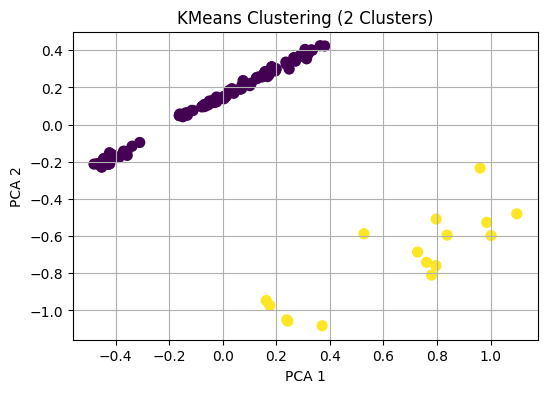

In [16]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 dimensi pada data Iris yang telah dinormalisasi dan direduksi menggunakan PCA menjadi 3 komponen, kemudian dilakukan clustering menggunakan K-Means dengan 2 cluster, disertai evaluasi menggunakan Inertia dan Silhouette Score untuk menilai kualitas pemisahan klasternya.

[2 Clusters] Inertia: 18.7351, Silhouette Score: 0.6627


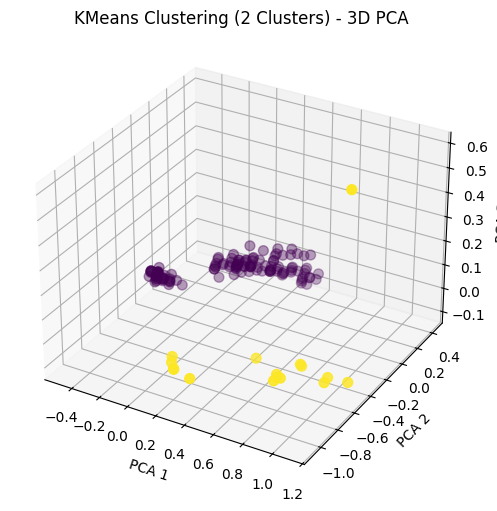

In [17]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()

### Clustering dengan 3 cluster dan Visualisasi data

Di sini saya melakukan clustering menggunakan K-Means dengan 3 cluster pada data yang telah dinormalisasi, kemudian mengevaluasi hasilnya menggunakan Inertia dan Silhouette Score untuk mengukur kekompakan dan kualitas pemisahan klaster. Setelah itu, hasil clustering divisualisasikan dalam bentuk scatter plot 2 dimensi berdasarkan hasil reduksi dimensi dengan PCA, agar dapat melihat pola penyebaran klaster secara lebih jelas dan intuitif.

[3 Clusters] Inertia: 6.3293, Silhouette Score: 0.6940


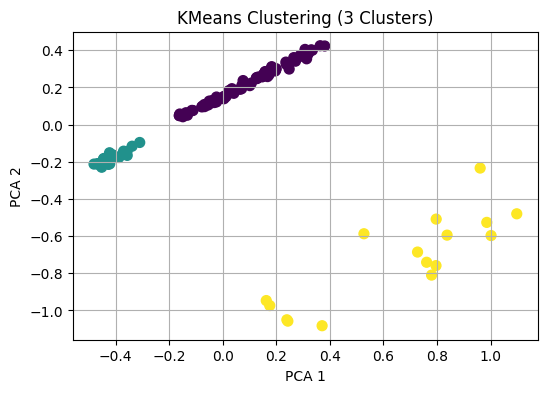

In [18]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 dimensi pada data Iris yang telah dinormalisasi dan direduksi menjadi 3 komponen menggunakan PCA, kemudian dikelompokkan menggunakan K-Means dengan 3 cluster. Evaluasi menggunakan Inertia dan Silhouette Score digunakan untuk menilai seberapa baik hasil clustering, dan visualisasi ini membantu saya melihat distribusi klaster secara lebih mendalam dalam ruang 3 dimensi.

[3 Clusters] Inertia: 6.3293, Silhouette Score: 0.6940


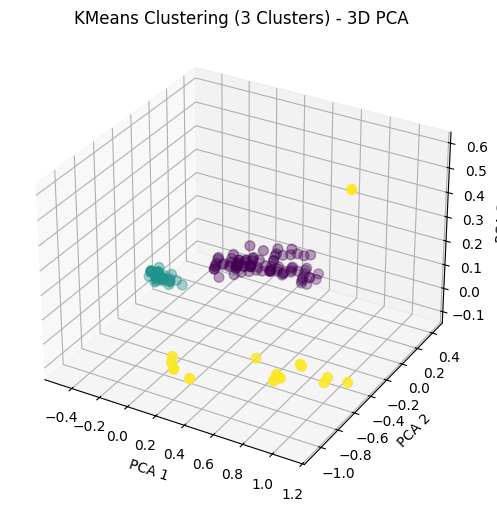

In [19]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()

### Clustering dengan 4 cluster dan Visualisasi data

Di sini saya melakukan clustering menggunakan K-Means dengan jumlah cluster sebanyak 4 pada data yang telah dinormalisasi, kemudian mengevaluasi hasilnya menggunakan Inertia dan Silhouette Score untuk mengetahui seberapa baik kualitas dan kekompakan klaster. Hasil clustering tersebut kemudian saya visualisasikan dalam bentuk scatter plot 2 dimensi menggunakan data yang telah direduksi dengan PCA, sehingga dapat terlihat pola dan penyebaran masing-masing klaster dengan lebih jelas.

[4 Clusters] Inertia: 3.9715, Silhouette Score: 0.6684


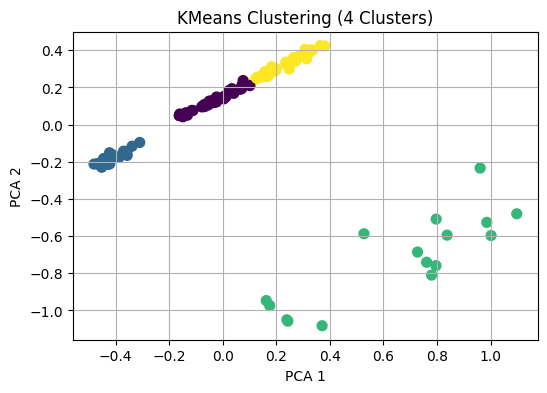

In [20]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 dimensi pada data Iris yang sudah dinormalisasi dan direduksi menggunakan PCA menjadi 3 komponen, lalu dilakukan clustering dengan K-Means sebanyak 4 cluster. Evaluasi menggunakan Inertia dan Silhouette Score dilakukan untuk mengukur kualitas pemisahan klaster, dan visualisasi ini membantu memperjelas distribusi klaster dalam ruang 3D.

[4 Clusters] Inertia: 3.9715, Silhouette Score: 0.6684


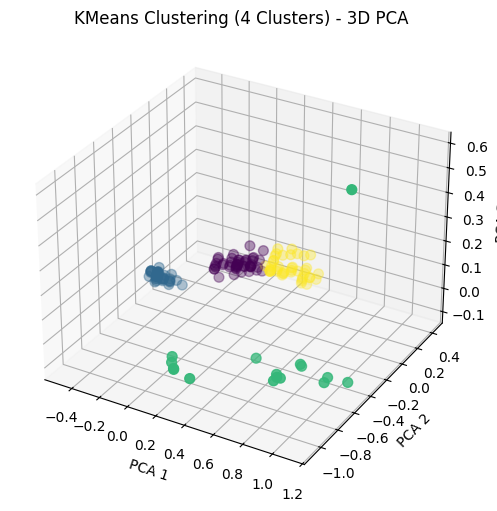

In [21]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()